In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784" ,version=1)

In [3]:
X = mnist["data"]
y = mnist["target"]

In [4]:
y = y.astype(np.uint8) # converting string labels to integers

In [5]:
X_train, X_test, y_train, y_test = X.iloc[:60000], X.iloc[60000:], y.iloc[:60000], y.iloc[60000:]

In [6]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [8]:
rf_clf = RandomForestClassifier(max_depth=30, n_estimators=300, n_jobs=-1)

In [9]:
start = time.time()
rf_clf.fit(X_train, y_train)
end = time.time()
end - start

35.14804029464722

In [10]:
y_pred = rf_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9698

**Dimensionality Reductions**

Reduce the dimensions to maintain 95% variance ratio

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [12]:
X_train_reduced.shape

(60000, 154)

In [13]:
X_test_reduced.shape

(10000, 154)

In [14]:
rf_clf = RandomForestClassifier(max_depth=30, n_estimators=300, n_jobs=-1)

In [15]:
start = time.time()
rf_clf.fit(X_train_reduced, y_train)
end = time.time()
end - start

82.08681225776672

In [16]:
y_pred = rf_clf.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9513

**Observations:**
Time taken to train a model is significantly higher in reduced dimension compare to actual training data and also loss on test set is also high

PCA can give you fast result but not always, all depends on feature types, models and training algorithm

**t-SNE**

It reduces the dimesions by trying to keep similar instances close and dis-similar instances apart, mostly used to visulize the clusters of high dimenstional features

In [17]:
mx = 10000

In [25]:
np.random.seed(42)
index = np.random.permutation(60000)[:mx]

In [26]:
X_selected = X_train[index]
y_selected = y_train[index]

In [27]:
X_selected.shape

(10000, 784)

In [28]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X_selected)

D:\TheCompleteML\env\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\TheCompleteML\env\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [29]:
X_reduced.shape

(10000, 2)

In [30]:
X_reduced[0]

array([68.87706, 37.55781], dtype=float32)

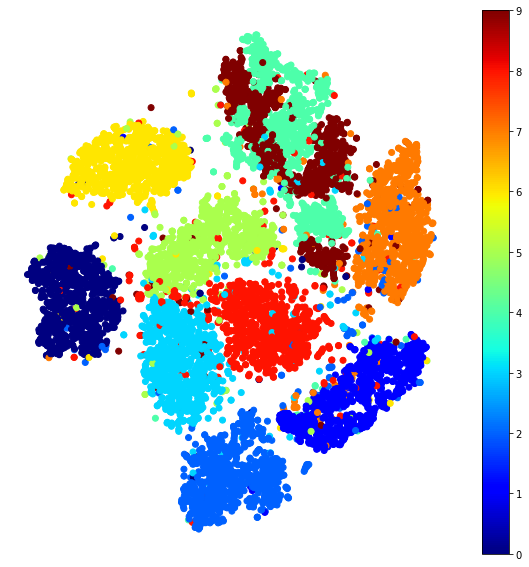

In [31]:
plt.figure(figsize=(10, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_selected, cmap="jet")
plt.axis("off")
plt.colorbar()
plt.show()

Just focus on the overlapping digits such as 2, 3 and 5

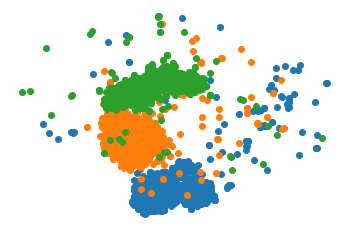

In [40]:
digits = (2, 3, 5)
cmap = mpl.cm.get_cmap("jet")
for digit in digits:
       plt.scatter(X_reduced[y_selected==digit, 0], X_reduced[y_selected==digit, 1], cmap=cmap)
plt.axis("off")
plt.show()